# Analyze Tensorflow Datasets
<!--<badge>--><a href="https://colab.research.google.com/github/visual-layer/vl-datasets/blob/tfds/notebooks/analyze-tfds-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

## Installation

In [1]:
!pip install -U tensorflow-datasets tensorflow matplotlib pip install protobuf==3.20.0

  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached tensorflow-2.11.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorflow-2.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached tensorflow-2.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.1 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached tensorflow-2.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.0 MB)
  Using cached tensorflow-2.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.w

## Download dataset from Tensorflow Datasets

In [2]:
import tensorflow_datasets as tfds
import os
from PIL import Image

# Download the CIFAR-10 dataset using TensorFlow Datasets
dataset_name = "cifar10"
dataset = tfds.load(dataset_name, split="train[:80%]")

2023-04-13 15:07:05.218064: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-13 15:07:05.252106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-13 15:07:05.252117: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-13 15:07:06.519598: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

## Convert Dataset to Images
The downloaded dataset are in binary format. Let's convert them into images and save the in our local directory.

The resulting directory should look like this

```
cifar10-dataset/
    ├── airplane
    |    ├── 0001.JPEG
    |    └── 0002.JPEG
    ├── automobile
    ├── bird
    ├── cat
    ├── deer
    ├── dog
    ├── frog
    ├── horse
    ├── ship
    └── truck
```

In [3]:
# Retrieve the label names from the dataset metadata
builder = tfds.builder(dataset_name)
label_names = builder.info.features['label'].names

# Create folders using the ImageNet convention
root_dir = "./cifar10/"
os.makedirs(root_dir, exist_ok=True)

# Initialize counter variable
counter = 0

for data in dataset:
    image, label = data['image'], data['label']
    label_name = label_names[label]
    label_dir = os.path.join(root_dir, label_name)
    os.makedirs(label_dir, exist_ok=True)

    # Save image in its respective folder
    image_file = f"{counter:08}.jpg"  # Use counter variable to generate unique file names
    image_path = os.path.join(label_dir, image_file)
    image_pil = Image.fromarray(image.numpy())
    image_pil.save(image_path)

    # Increment counter variable
    counter += 1


## Construct Annotation DataFrame
fastdup expects the annotations of the dataset to be in a certain dataframe format.

In [4]:
import pandas as pd

# Get a list of file paths for all JPEG files in the directory and its subdirectories
file_paths = []
labels = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg')):
            file_paths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))

# Create a pandas dataframe from the list of file paths and labels
df = pd.DataFrame({'filename': file_paths, 'label': labels, 'split': 'train'})

# Print the resulting dataframe
df

,filename,label,split
0,./cifar10/horse/00036092.jpg,horse,train
1,./cifar10/horse/00033471.jpg,horse,train
2,./cifar10/horse/00027389.jpg,horse,train
3,./cifar10/horse/00032426.jpg,horse,train
4,./cifar10/horse/00025215.jpg,horse,train
...,...,...,...
39995,./cifar10/ship/00023957.jpg,ship,train
39996,./cifar10/ship/00012385.jpg,ship,train
39997,./cifar10/ship/00035454.jpg,ship,train
39998,./cifar10/ship/00008999.jpg,ship,train


## Import and run fastdup

In [5]:
import fastdup
fastdup.__version__

'0.915'

In [6]:
fd = fastdup.create("report/", "cifar10")
fd.run(annotations=df, overwrite=True, num_images=5000)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-04-13 15:07:14 [INFO] Going to loop over dir cifar10
2023-04-13 15:07:14 [INFO] Found total 5000 images to run on, 5000 train, 0 test, name list 5000, counter 5000 
2023-04-13 15:07:26 [INFO] Found total 5000 images to run ontimated: 0 Minutes 0 Features
Finished histogram 0.891
Finished bucket sort 0.905
2023-04-13 15:07:27 [INFO] 157) Finished write_index() NN model
2023-04-13 15:07:27 [INFO] Stored nn model index file report/nnf.index
2023-04-13 15:07:27 [INFO] Total time took 12283 ms
2023-04-13 15:07:27 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-04-13 15:07:27 [INFO] Found a total of 4 nearly identical images(d>0.980), which are 0.03 %
2023-04-13 15:07:27 [INFO] Found a total of 6071 above threshold images (d>0.900), which are 40.47 %
2023-04-13 15:07:27 [INFO] Found a total of 500 outlier images         (d<0.050), which are 3.33 %
2023-04-13 15:07:27 [INFO] Min d

Traceback (most recent call last):
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/sentry.py", line 121, in inner_function
    ret = func(*args, **kwargs)
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 287, in connected_components
    df_cc = self._add_annot_and_split(df_cc, data, merge_on=[FD.ANNOT_FD_ID], split=split, suffix=False,
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 645, in _add_annot_and_split
    df_annot = self._merge_df_with_annot(df, left_on=merge_on, suffix=suffix, unannotated=unannotated, load_crops=load_crops)
  File "/home/dnth/anaconda3/envs/fastdupv1/lib/python3.10/site-packages/fastdup/fastdup_controller.py", line 684, in _merge_df_with_annot
    assert len(df_annot), f"Failed to find valid annotations"
AssertionError: Failed to find valid annotations
Traceback (most recent call last):
  File "/home/dnth


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 45000 images
    Valid images are 0.00% (0) of the data, invalid are 100.00% (45,000) of the data
    For a detailed analysis, use `.invalid_instances()`.

    Components:  failed to find images clustered into components, try to run with lower cc_threshold.
    Outliers: Unable to calculate outliers.


In [7]:
fd.annotations()

,filename,label,split,index,error_code,is_valid
fd_index,,,,,,


## Visualize Galleries

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 720.22it/s]

Stored similar images visual view in  report/galleries/similarity.html



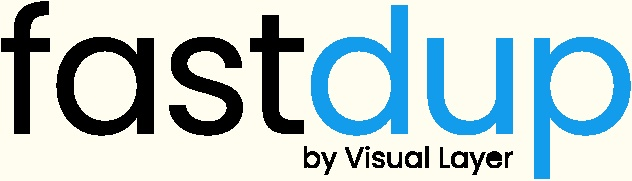
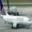
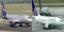
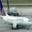
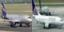
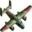
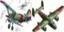
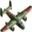
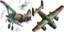
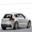
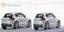
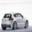
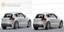
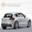
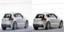
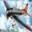
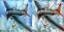
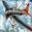
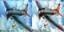
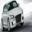
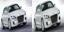
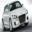
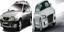
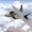
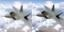
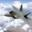
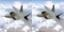
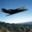
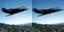
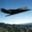
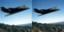
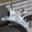
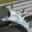
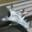
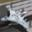
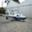
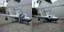
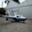
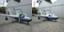
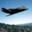
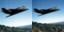

,from,to,distance
1931,cifar10/airplane/00030261.jpg,"[cifar10/airplane/00039864.jpg, cifar10/airplane/00001951.jpg]","[0.981743, 0.929456]"
2547,cifar10/airplane/00039864.jpg,"[cifar10/airplane/00030261.jpg, cifar10/airplane/00001951.jpg]","[0.981743, 0.914067]"
2477,cifar10/airplane/00039151.jpg,"[cifar10/airplane/00007881.jpg, cifar10/airplane/00024587.jpg]","[0.981322, 0.942502]"
540,cifar10/airplane/00007881.jpg,"[cifar10/airplane/00039151.jpg, cifar10/airplane/00024587.jpg]","[0.981322, 0.922348]"
3005,cifar10/automobile/00005747.jpg,"[cifar10/automobile/00002179.jpg, cifar10/automobile/00002006.jpg]","[0.977198, 0.974217]"
...,...,...,...
1895,cifar10/airplane/00029528.jpg,[cifar10/airplane/00003602.jpg],[0.900115]
3163,cifar10/automobile/00007309.jpg,[cifar10/automobile/00002564.jpg],[0.900072]
1742,cifar10/airplane/00027234.jpg,[cifar10/airplane/00035144.jpg],[0.900052]
1220,cifar10/airplane/00018818.jpg,[cifar10/airplane/00004191.jpg],[0.900051]


In [8]:
fd.vis.similarity_gallery()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 38603.81it/s]

Stored outliers visual view in  report/galleries/outliers.html



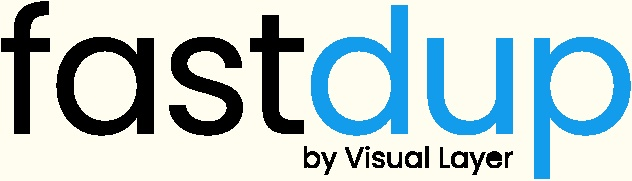
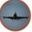
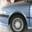
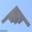
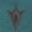
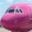
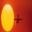
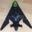
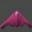
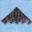
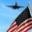
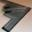
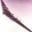
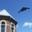
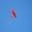
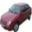
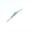
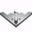
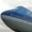
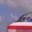
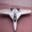

In [9]:
fd.vis.outliers_gallery()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 2821.69it/s]

Finished OK. Components are stored as image files report/galleries/components_[index].jpg
Stored components visual view in  report/galleries/components.html
Execution time in seconds 0.3



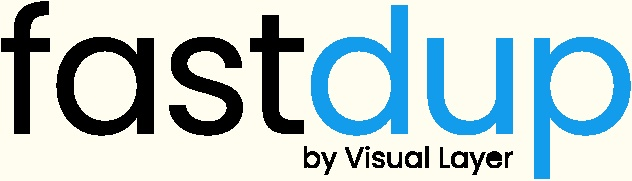
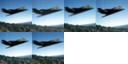
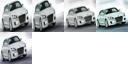
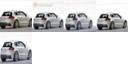
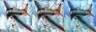
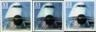
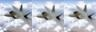
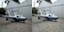
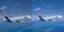
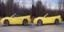
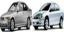
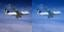
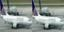
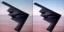
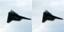
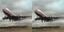
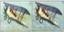
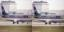
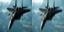
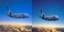
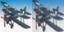

In [10]:
fd.vis.component_gallery()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 6119.50it/s]

Stored mean visual view in  report/galleries/mean.html



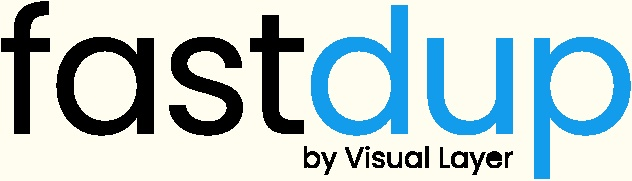
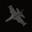
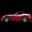
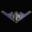
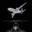
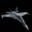
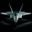
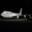
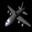
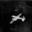
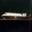
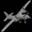
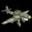
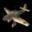
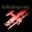
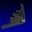
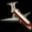
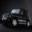
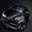
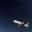
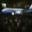

In [11]:
fd.vis.stats_gallery(metric='dark')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 7366.18it/s]


Stored mean visual view in  report/galleries/mean.html



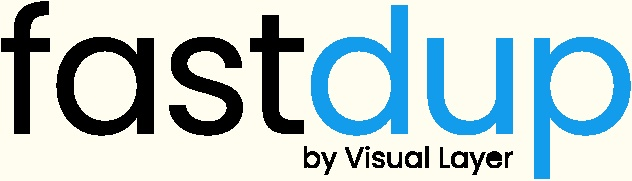
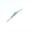
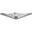
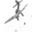
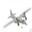
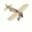
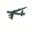
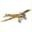
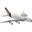
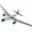
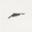
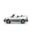
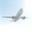
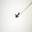
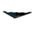
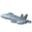
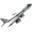
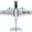
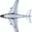
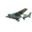
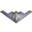

In [12]:
fd.vis.stats_gallery(metric='bright')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 6973.07it/s]


Stored blur visual view in  report/galleries/blur.html



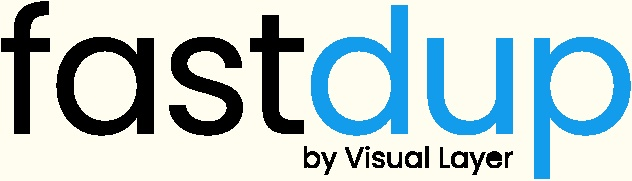
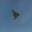
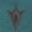
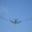
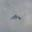
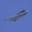
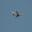
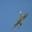
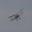
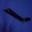
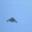
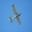
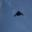
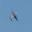
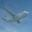
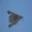
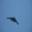
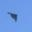
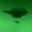
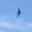
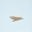

In [13]:
fd.vis.stats_gallery(metric='blur')